## DATA 601 Project-1 (Spring 2022)
### Deadline: March 31, 11:59 pm
Please download these the csv files <br>
File-1: Maryland Statewide Vehicle Crashes:  <br>
https://opendata.maryland.gov/Public-Safety/Maryland-Statewide-Vehicle-Crashes/65du-s3qu

File-2: Person Details:  <br>
https://opendata.maryland.gov/Public-Safety/Maryland-Statewide-Vehicle-Crashes-Person-Details-/py4c-dicf

File-3: Vehicle Details:  <br>
https://opendata.maryland.gov/Public-Safety/Maryland-Statewide-Vehicle-Crashes-Vehicle-Details/mhft-5t5y

<br>

We will only use "Accident Year = 2020" data. So, please remove all the unncessary rows. Names these files as "crashes.csv", "persons.csv", and "vehicles.csv", respetively. I will test your notebook with the files I created, so if you have a different naming, your code won't work.

In [2]:
#creating data frames
import pandas as pd
import csv
import numpy as np
# first csv file
df = pd.read_csv('D:\c drive\Desktop\pandas\data_601_project_1\Maryland_Statewide_Vehicle_Crashes.csv')
df = df.drop(df.index[df['YEAR'] != 2020])
#print(df)
df.to_csv('crashes.csv' , index=False)
crashes = pd.read_csv('crashes.csv')
print(crashes.head())

C:\Users\shashi\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (34,46) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


   YEAR QUARTER LIGHT_DESC  LIGHT_CODE     COUNTY_DESC  COUNTY_NO  MUNI_DESC  \
0  2020      Q2   Daylight        1.00       Baltimore        3.0        NaN   
1  2020      Q2        NaN        6.02  Baltimore City       24.0        NaN   
2  2020      Q2   Daylight        1.00      Montgomery       15.0        NaN   
3  2020      Q2   Daylight        1.00           Cecil        7.0        NaN   
4  2020      Q2   Daylight        1.00    Anne Arundel        2.0        NaN   

   MUNI_CODE     JUNCTION_DESC  JUNCTION_CODE  ... FEET_MILES_FLAG_DESC  \
0        NaN               NaN            NaN  ...                  NaN   
1        NaN  Non Intersection            1.0  ...                Miles   
2        NaN               NaN            NaN  ...                  NaN   
3        NaN               NaN            NaN  ...                  NaN   
4        NaN               NaN            NaN  ...                  NaN   

   FEET_MILES_FLAG DISTANCE_DIR_FLAG  REFERENCE_NO REFERENCE_TYPE_CO

In [3]:
# second csv file
df1 = pd.read_csv('D:\c drive\Desktop\pandas\data_601_project_1\Maryland_Statewide_Vehicle_Crashes_-_Person_Details__Anonymized_.csv')
df1 = df1.drop(df1.index[df1['YEAR'] != 2020])
#print(df1.head())
df1.to_csv('persons.csv', index=False)
persons = pd.read_csv('persons.csv')
print(persons.head())



C:\Users\shashi\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (37) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


  SEX_DESC SEX_CODE     CONDITION_DESC  CONDITION_CODE  \
0   Female        F  Apparently Normal             1.0   
1      NaN      NaN            Unknown            99.0   
2     Male        M  Apparently Normal             1.0   
3     Male        M  Apparently Normal             1.0   
4   Female        F                NaN             NaN   

                   INJ_SEVER_DESC  INJ_SEVER_CODE     REPORT_NO  \
0  Possible Incapacitating Injury               3    DA32230016   
1                       No Injury               1    DA40360040   
2                       No Injury               1  MDTA1655001L   
3                       No Injury               1    CB60350070   
4                       No Injury               1   MSP71270044   

  OCC_SEAT_POS_DESC  OCC_SEAT_POS_CODE PED_VISIBLE_DESC  ...  \
0               NaN                NaN              NaN  ...   
1               NaN                NaN              NaN  ...   
2               NaN                NaN              NaN 

In [4]:
# third csv file
df2 = pd.read_csv('D:\c drive\Desktop\pandas\data_601_project_1\Maryland_Statewide_Vehicle_Crashes_-_Vehicle_Details.csv')
df2 = df2.drop(df2.index[df2['YEAR'] != 2020])
#print(df2.head())
df2.to_csv('vehicles.csv' , index = False)
vehicles = pd.read_csv('vehicles.csv')
print(vehicles.head())


  HARM_EVENT_DESC  HARM_EVENT_CODE CONTI_DIRECTION_DESC CONTI_DIRECTION_CODE  \
0   Other Vehicle              1.0                North                    N   
1   Other Vehicle              1.0                North                    N   
2   Other Vehicle              1.0                South                    S   
3    Fixed Object              9.0              Unknown                    U   
4   Other Vehicle              1.0                 East                    E   

   DAMAGE_DESC  DAMAGE_CODE            MOVEMENT_DESC  MOVEMENT_CODE  \
0      Unknown           99                  Unknown           99.0   
1  Superficial            2    Moving Constant Speed            1.0   
2   Functional            3  Stopped in Traffic Lane            6.0   
3      Unknown           99           Not Applicable            0.0   
4    Disabling            4      Slowing or Stopping            3.0   

              VIN_NO     REPORT_NO  ... TOWED_VEHICLE_CONFIG_DESC  \
0                NaN   

### Q1
From these three csv files, create a single dataframe which will include following columns only <br>
- from the "crashes.csv", accident data (acc_dat), accident time (acc_time), weather description (weather_desc),report no, county (county_desc), latittude, and longitude
- from the "persons.csv", gender, data of birth, and state code
- from the "vehicles.csv", vehicle year, vehicle make, speed limit
<br>

Save your dataframe as a new csv file called "md_crash_2020.csv".

Note: All these csv files have the 'REPORT_NO' column. You need to use that column to combine these datasets.

In [5]:
df_new = pd.merge(crashes[['ACC_DATE','ACC_TIME','WEATHER_DESC','REPORT_NO','COUNTY_DESC','LATITUDE','LONGITUDE']],persons[['SEX_DESC','REPORT_NO','DATE_OF_BIRTH','LICENSE_STATE_CODE']],on ='REPORT_NO', how= 'left')
#print(df_new)
df_new1 = pd.merge(df_new,vehicles[['VEH_YEAR','VEH_MAKE','SPEED_LIMIT','REPORT_NO']],on ='REPORT_NO', how= 'left')
print(df_new1)
df_new1.to_csv("md_crash_2020.csv",index='FALSE')

        ACC_DATE  ACC_TIME    WEATHER_DESC   REPORT_NO     COUNTY_DESC  \
0       20200618  15:15:00  Not Applicable  AE58770052       Baltimore   
1       20200618  15:15:00  Not Applicable  AE58770052       Baltimore   
2       20200430  06:39:00             NaN  ADJ984001J  Baltimore City   
3       20200430  06:39:00             NaN  ADJ984001J  Baltimore City   
4       20200430  06:39:00             NaN  ADJ984001J  Baltimore City   
...          ...       ...             ...         ...             ...   
412479  20201013  13:00:00             NaN  DD5634003D      Montgomery   
412480  20201013  13:00:00             NaN  DD5634003D      Montgomery   
412481  20201013  13:00:00             NaN  DD5634003D      Montgomery   
412482  20201008  19:22:00             NaN  AE5005007P       Baltimore   
412483  20201008  19:22:00             NaN  AE5005007P       Baltimore   

         LATITUDE  LONGITUDE SEX_DESC  DATE_OF_BIRTH LICENSE_STATE_CODE  \
0       39.277263 -76.503693      Na

In [6]:
md_crash = pd.read_csv('D:\c drive\Desktop\pandas\data_601_project_1\md_crash_2020.csv')
md_crash


,Unnamed: 0,ACC_DATE,ACC_TIME,WEATHER_DESC,REPORT_NO,COUNTY_DESC,LATITUDE,LONGITUDE,SEX_DESC,DATE_OF_BIRTH,LICENSE_STATE_CODE,VEH_YEAR,VEH_MAKE,SPEED_LIMIT
0,0,20200618,15:15:00,Not Applicable,AE58770052,Baltimore,39.277263,-76.503693,NaN,NaN,NaN,2019.0,TOY,5.0
1,1,20200618,15:15:00,Not Applicable,AE58770052,Baltimore,39.277263,-76.503693,NaN,NaN,NaN,NaN,UNKNOWN,5.0
2,2,20200430,06:39:00,NaN,ADJ984001J,Baltimore City,39.311025,-76.616429,Male,19750621.0,MD,2005.0,HYUNDAI,45.0
3,3,20200430,06:39:00,NaN,ADJ984001J,Baltimore City,39.311025,-76.616429,Male,19750621.0,MD,2014.0,SUBA,30.0
4,4,20200430,06:39:00,NaN,ADJ984001J,Baltimore City,39.311025,-76.616429,Male,19750621.0,MD,2015.0,VOLK,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
412479,412479,20201013,13:00:00,NaN,DD5634003D,Montgomery,39.075324,-77.137168,Male,19761004.0,NaN,2016.0,PIRC,0.0
412480,412480,20201013,13:00:00,NaN,DD5634003D,Montgomery,39.075324,-77.137168,Male,19590827.0,MD,2020.0,LEXUS,0.0
412481,412481,20201013,13:00:00,NaN,DD5634003D,Montgomery,39.075324,-77.137168,Male,19590827.0,MD,2016.0,PIRC,0.0
412482,412482,20201008,19:22:00,NaN,AE5005007P,Baltimore,39.481875,-76.669389,NaN,NaN,NaN,NaN,UNKNOWN,25.0


### Q2
a. For each county, determine the average age of the drivers who were involved in these accidents  <br>
b. Then list the sorted averages (from youngest to oldest) <br>

In [7]:
temp_df = md_crash.copy()
temp_df = temp_df[temp_df['DATE_OF_BIRTH'].notna()]
print(temp_df)

        Unnamed: 0  ACC_DATE  ACC_TIME WEATHER_DESC   REPORT_NO  \
2                2  20200430  06:39:00          NaN  ADJ984001J   
3                3  20200430  06:39:00          NaN  ADJ984001J   
4                4  20200430  06:39:00          NaN  ADJ984001J   
5                5  20200430  06:39:00          NaN  ADJ984001J   
10              10  20200430  06:39:00          NaN  ADJ984001J   
...            ...       ...       ...          ...         ...   
412478      412478  20201013  13:00:00          NaN  DD5634003D   
412479      412479  20201013  13:00:00          NaN  DD5634003D   
412480      412480  20201013  13:00:00          NaN  DD5634003D   
412481      412481  20201013  13:00:00          NaN  DD5634003D   
412483      412483  20201008  19:22:00          NaN  AE5005007P   

           COUNTY_DESC   LATITUDE  LONGITUDE SEX_DESC  DATE_OF_BIRTH  \
2       Baltimore City  39.311025 -76.616429     Male     19750621.0   
3       Baltimore City  39.311025 -76.616429     Ma

In [8]:
from datetime import datetime, date
temp_df['DATE_TIME'] = temp_df['DATE_OF_BIRTH'].apply(lambda x : pd.to_datetime(str(x), format = '%Y%m%d'))

def age_from_birthday(born):
    today = date.today()
    return today.year - born.year - ((today.month,today.day) < (born.month,born.day))
temp_df['AGE'] = temp_df['DATE_TIME'].apply(lambda x: age_from_birthday(x))

In [9]:
grouped_data = temp_df.groupby('COUNTY_DESC').mean()[['AGE']]
grouped_data

,AGE
COUNTY_DESC,
Allegany,40.995446
Anne Arundel,39.242789
Baltimore,39.689273
Baltimore City,37.891619
Calvert,38.990380
Caroline,38.810119
Carroll,40.503108
Cecil,38.794913
Charles,37.895937


In [10]:
# b. Then list the sorted averages (from youngest to oldest)
grouped_data.sort_values(['AGE'])

,AGE
COUNTY_DESC,
Worcester,35.966642
Baltimore City,37.891619
Charles,37.895937
St. Mary's,38.140042
Wicomico,38.185409
Prince George's,38.199314
Garrett,38.529322
Cecil,38.794913
Caroline,38.810119


### Q3
a. Determine the total number of crashes per "vehicle make". List the sorted values (e.g. Honda, 1234)<br>
b. Determine average age of the car involved in these accidents for each "vehicle make".  <br>

In [11]:
# a. Determine the total number of crashes per "vehicle make". List the sorted values (e.g. Honda, 1234)
from collections import Counter
c = dict(Counter(md_crash['VEH_MAKE'].values))
no_of_crashes_per_vechicle_make = [(k, v )for k, v in sorted(c.items(), key=lambda item: item[1], reverse=True)]
no_of_crashes_per_vechicle_make

[('FORD', 48632),
 ('HONDA', 41358),
 ('TOYOTA', 39721),
 ('NISSAN', 28066),
 ('UNKNOWN', 18940),
 ('DODGE', 15492),
 ('CHEVY', 14858),
 ('CHEVROLET', 13924),
 ('HYUNDAI', 13912),
 ('JEEP', 11232),
 ('TOYT', 10321),
 ('CHEV', 9320),
 ('KIA', 8923),
 ('ACURA', 7544),
 ('GMC', 6640),
 ('HOND', 5975),
 ('BMW', 5845),
 ('LEXUS', 5361),
 ('NISS', 5188),
 ('MAZDA', 5169),
 ('HYUN', 4842),
 ('SUBARU', 4164),
 ('CHRYSLER', 3868),
 ('BUICK', 2737),
 ('MERCEDES', 2610),
 ('INFINITI', 2603),
 ('MERZ', 2291),
 ('AUDI', 2290),
 ('VOLKSWAGEN', 2102),
 ('VOLVO', 2096),
 ('VOLK', 1874),
 ('DODG', 1837),
 ('VOLKSWAGON', 1679),
 ('RAM', 1673),
 ('CHRY', 1621),
 ('INTERNATIONAL', 1549),
 ('FREIGHTLINER', 1546),
 ('CADILLAC', 1490),
 ('FRHT', 1437),
 ('LINCOLN', 1412),
 ('MITSUBISHI', 1405),
 ('SUBA', 1316),
 ('PONTIAC', 1273),
 ('MERCURY', 1112),
 ('ACUR', 1070),
 ('INTL', 1018),
 ('MAZD', 975),
 ('INFI', 971),
 ('SATURN', 942),
 ('CADI', 930),
 ('INFINITY', 908),
 ('MITS', 908),
 ('VW', 847),
 ('MACK', 

In [12]:
# b. Determine average age of the car involved in these accidents for each "vehicle make"
def get_veh_age(year):
    return 2020-year
md_crash['VEH_AGE'] = md_crash['VEH_YEAR'].apply(get_veh_age)
md_crash.groupby('VEH_MAKE').mean()[['VEH_AGE']]

,VEH_AGE
VEH_MAKE,
00,1520.0
000,2020.0
0000,1818.0
00000,2020.0
0099,1932.0
...,...
YY 150 TS,14.0
ZERO,0.0
ZHEJIANG,1.0


### Q4
a. Determine all the accidents that happened in a circle centered at (39.016149, -77.117942) with a radius of 5 km. Among them,  <br>
b. Determine the number of accidents where the speed limit was above 51 miles per hour. <br>
c. Determine the number of accidents where the speed limit was below 41 miles per hour.  <br>
<br>
Hint: Please see the "P1_Helper_Distance_From_Coordinates.ipynb" that can be found at https://github.com/simsekergun/DATA601/tree/main/Project1

In [13]:
from math import radians, sin, cos, acos
md_crash1 = md_crash.copy()
slat = 39.016149
slon = -77.117942
elat = md_crash1['LATITUDE']
elon = md_crash1['LONGITUDE']
t = np.sin(slat)*np.sin(elat) + np.cos(slat)*np.cos(elat)*np.cos(slon - elon)
md_crash1['DIST_FROM_C'] = 6371.01 * np.arccos(t)
accs_within_5miles = md_crash1[md_crash1['DIST_FROM_C'] <= 5]
accs_within_5miles

,Unnamed: 0,ACC_DATE,ACC_TIME,WEATHER_DESC,REPORT_NO,COUNTY_DESC,LATITUDE,LONGITUDE,SEX_DESC,DATE_OF_BIRTH,LICENSE_STATE_CODE,VEH_YEAR,VEH_MAKE,SPEED_LIMIT,VEH_AGE,DIST_FROM_C
90924,90924,20200217,14:09:00,NaN,MSP7192000Z,Montgomery,39.015858,-77.116167,Male,19920504.0,MD,2006.0,CADILLAC,55.0,14.0,3.391236
90925,90925,20200217,14:09:00,NaN,MSP7192000Z,Montgomery,39.015858,-77.116167,Male,19920504.0,MD,2018.0,FORD,55.0,2.0,3.391236
90926,90926,20200217,14:09:00,NaN,MSP7192000Z,Montgomery,39.015858,-77.116167,Male,19700720.0,MD,2006.0,CADILLAC,55.0,14.0,3.391236
90927,90927,20200217,14:09:00,NaN,MSP7192000Z,Montgomery,39.015858,-77.116167,Male,19700720.0,MD,2018.0,FORD,55.0,2.0,3.391236
111113,111113,20200211,04:25:00,Raining,MSP694200G5,Montgomery,39.015737,-77.118117,Male,19590528.0,MD,2001.0,BMW,55.0,19.0,2.638913
161193,161193,20200327,19:20:00,NaN,MSP694200GP,Montgomery,39.015981,-77.118371,Male,19550714.0,VA,2000.0,HONDA,55.0,20.0,1.270723
161194,161194,20200327,19:20:00,NaN,MSP694200GP,Montgomery,39.015981,-77.118371,Male,19550714.0,VA,2013.0,FORD,55.0,7.0,1.270723
161195,161195,20200327,19:20:00,NaN,MSP694200GP,Montgomery,39.015981,-77.118371,Male,19951121.0,MD,2000.0,HONDA,55.0,20.0,1.270723
161196,161196,20200327,19:20:00,NaN,MSP694200GP,Montgomery,39.015981,-77.118371,Male,19951121.0,MD,2013.0,FORD,55.0,7.0,1.270723
311448,311448,20201207,13:45:00,NaN,MCP3143002B,Montgomery,39.016237,-77.119660,Male,19541123.0,VA,2008.0,FORD,45.0,12.0,2.803515


In [14]:
# b.Determine the number of accidents where the speed limit was above 51 miles per hour
l1 = len(accs_within_5miles[accs_within_5miles.SPEED_LIMIT > 51])
print("N.o of accidents where speed limit above 51 mph:", l1)

N.o of accidents where speed limit above 51 mph: 18


In [15]:
#c. Determine the number of accidents where the speed limit was below 41 miles per hour.
l2 = len(accs_within_5miles[accs_within_5miles.SPEED_LIMIT < 41])
print("N.o of accidents where speed limit below 41 mph:", l2)

N.o of accidents where speed limit below 41 mph: 4


### Q5
Download "Licensed Drivers By Sex" data from  <br>
https://github.com/simsekergun/DATA601/tree/main/Project1

a. Determine the number of drivers, who got in a car crash, from non-DMV states as a function of gender and list them <br>
`St Male Female` <br>
`NY 1510  622` <br>
`PA 1251 1312` <br>
... <br>
Note: DMV states: DC, MD, and VA  <br>
 <br>
b. Normalize the previous list with number of male drivers and female drivers for each state. e.g. There are 1 million male drivers in NY and 2 million female drivers, then the normalized numbers should be <br>
<br>
`St    Male_Norm  Female_Norm` <br>
`NY    1.510e-3  0.311e-3` <br>



In [16]:

md_crash1 = md_crash.copy()
md_crash1 = md_crash1[md_crash1['LICENSE_STATE_CODE'] != 'DC'][md_crash1['LICENSE_STATE_CODE'] != 'MD'][md_crash1['LICENSE_STATE_CODE'] != 'VA']

C:\Users\shashi\AppData\Local\Temp/ipykernel_15980/1232344843.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  md_crash1 = md_crash1[md_crash1['LICENSE_STATE_CODE'] != 'DC'][md_crash1['LICENSE_STATE_CODE'] != 'MD'][md_crash1['LICENSE_STATE_CODE'] != 'VA']


In [17]:
#a.Determine the number of drivers, who got in a car crash, from non-DMV states as a function of gender and list them
t = pd.merge(md_crash1['LICENSE_STATE_CODE'],pd.get_dummies(md_crash1['SEX_DESC']),left_index=True, right_index=True)[['LICENSE_STATE_CODE','Female','Male']]
drivers_by_sex = t.groupby('LICENSE_STATE_CODE').count().reset_index()
drivers_by_sex

,LICENSE_STATE_CODE,Female,Male
0,AB,2,2
1,AK,49,49
2,AL,108,108
3,AR,60,60
4,AS,2,2
...,...,...,...
62,WI,72,72
63,WV,1588,1588
64,WY,20,20
65,XX,2978,2978


In [18]:

#Normalize the previous list with number of male drivers and female drivers for each state. e.g. There are 1 million male drivers in NY and 2 million female drivers, then the normalized numbers should be
no_of_female_drives = sum(drivers_by_sex['Female'])
no_of_male_drives = sum(drivers_by_sex['Male'])

drivers_by_sex_normalized = drivers_by_sex.copy()
drivers_by_sex_normalized['Female'] = drivers_by_sex['Female']/no_of_female_drives
drivers_by_sex_normalized['Male'] = drivers_by_sex['Male']/no_of_female_drives
drivers_by_sex_normalized

,LICENSE_STATE_CODE,Female,Male
0,AB,0.000076,0.000076
1,AK,0.001865,0.001865
2,AL,0.004110,0.004110
3,AR,0.002283,0.002283
4,AS,0.000076,0.000076
...,...,...,...
62,WI,0.002740,0.002740
63,WV,0.060428,0.060428
64,WY,0.000761,0.000761
65,XX,0.113322,0.113322


### Q6
a. On which day of the week (Monday through Sunday) do the most of the crashes happen? <br>
b. On which hour of the day (00 - 24) do the most of the crashes happen?  <br>

In [19]:
from datetime import datetime,date
df_temp = md_crash.copy()
def get_day(d, format):
    week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    d = datetime.strptime(d, format).date()
    return week[d.weekday()]

def day(d):
    if(pd.notnull(d)==False):
        return -1
    for fm in ["%Y%m%d", "%d-%b-%y", "%d/%m/%Y"]:
        try:
            return get_day(str(d)[:9], fm)
        except:
            continue
    return -1

df_temp['ACC_DAY'] = df_temp['ACC_DATE'].apply(day)

In [20]:
# a. On which day of the week (Monday through Sunday) do the most of the crashes happen?
# Most accidents happen on Friday.
df_temp['ACC_DAY'].value_counts()


Friday       70009
Saturday     60293
Wednesday    59979
Thursday     59860
Monday       56854
Tuesday      55919
Sunday       49570
Name: ACC_DAY, dtype: int64

In [21]:
# b. On which hour of the day (00 - 24) do the most of the crashes happen?
def hour(time):
    try:
        return int(str(time).split(':')[0])
    except:
        return -1

df_temp['ACC_HOUR'] = df_temp['ACC_TIME'].apply(hour)
df_temp['ACC_HOUR'].value_counts()

17    34885
16    33804
15    33605
18    29209
14    28683
12    25320
13    24779
19    22191
11    20365
20    18466
10    16706
21    15865
9     15452
8     15107
7     13715
22    12612
23    10849
6      9217
0      8130
1      6474
5      5173
2      5094
3      3660
4      3123
Name: ACC_HOUR, dtype: int64

In [22]:
print("a. Most accidents happen on Friday")
print("b. Most accidents occur at time 17:00")

a. Most accidents happen on Friday
b. Most accidents occur at time 17:00


### Q7
Download "Maryland Average Precipitation and Snow 2020" data from  <br>
https://github.com/simsekergun/DATA601/tree/main/Project1

You need assume that it is a rainy/snowy day if the second column is bigger than 0.05 or if the third column is bigger than 1; otherwise take that day as a non-rainy/snowy day. <br>
a. What is the ratio of the number of accidents happened in rainy/snowy days to the number of accidents happened in non-rainy/snowy days? <br>
b. What does this ratio tell us?

In [23]:
import requests
url = "https://raw.githubusercontent.com/simsekergun/DATA601/main/Project1/MD2020_Rain_Snow.csv"
r = requests.get(url, allow_redirects=True)
open('weather.csv', 'wb').write(r.content)

6840

In [24]:
df_temp = md_crash.copy()
df_temp = df_temp[df_temp['ACC_DATE'].notna()]

weather = pd.read_csv("weather.csv")
def get_weather(row):
    if(row['Precip in.'] > 0.05):
        return 'Snowy'
    if(row['Snow in.'] > 1):
        return 'Rainy'
    return 'none'

weather["WEATHER"] = "none"
weather["WEATHER"][weather['Precip in.'] > 0.05] = 'Rainy'
weather["WEATHER"][weather['Snow in.'] > 1] = 'Snowy'

def gdate(d):
    return datetime.strptime(d[:-1], "%m/%d/%Y").date().strftime("%d/%m/%Y")
weather["Date"] = weather["Date"].apply(gdate)

C:\Users\shashi\AppData\Local\Temp/ipykernel_15980/2765788280.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather["WEATHER"][weather['Precip in.'] > 0.05] = 'Rainy'
C:\Users\shashi\AppData\Local\Temp/ipykernel_15980/2765788280.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather["WEATHER"][weather['Snow in.'] > 1] = 'Snowy'


In [25]:
def get_mdate(d, format):
    return datetime.strptime(d, format).date().strftime("%d/%m/%Y")

def mdate(d):
    if(pd.notnull(d)==False):
        return -1
    for fm in ["%Y%m%d", "%d-%b-%y", "%d/%m/%Y"]:
        try:
            return get_mdate(str(d)[:9], fm)
        except:
            continue
    return -1

df_temp['Date'] = df_temp['ACC_DATE'].apply(mdate)

df_temp = pd.merge(df_temp, weather, on='Date', how='left')
print(df_temp)

        Unnamed: 0  ACC_DATE  ACC_TIME    WEATHER_DESC   REPORT_NO  \
0                0  20200618  15:15:00  Not Applicable  AE58770052   
1                1  20200618  15:15:00  Not Applicable  AE58770052   
2                2  20200430  06:39:00             NaN  ADJ984001J   
3                3  20200430  06:39:00             NaN  ADJ984001J   
4                4  20200430  06:39:00             NaN  ADJ984001J   
...            ...       ...       ...             ...         ...   
412479      412479  20201013  13:00:00             NaN  DD5634003D   
412480      412480  20201013  13:00:00             NaN  DD5634003D   
412481      412481  20201013  13:00:00             NaN  DD5634003D   
412482      412482  20201008  19:22:00             NaN  AE5005007P   
412483      412483  20201008  19:22:00             NaN  AE5005007P   

           COUNTY_DESC   LATITUDE  LONGITUDE SEX_DESC  DATE_OF_BIRTH  \
0            Baltimore  39.277263 -76.503693      NaN            NaN   
1            Ba

In [26]:
# a. What is the ratio of the number of accidents happened in rainy/snowy days to the number of accidents happened in non-rainy/snowy days?
weather_acc_data = dict(df_temp.WEATHER.value_counts())
ratio = (weather_acc_data['Snowy'] + weather_acc_data['Rainy'])/weather_acc_data['none']

print("Ratio of the n.o of accidents happened in rainy/snowy days to non-rainy/snowy days:", ratio)

Ratio of the n.o of accidents happened in rainy/snowy days to non-rainy/snowy days: 0.5960841217327374


In [27]:
#b. What does this ratio tell us?
print('This ratio tells us that accidents happens mostly in rainy/snowy days')

This ratio tells us that accidents happens mostly in rainy/snowy days


#Q8
Use matplotlib and/or seaborn and show your talent in data visualization. You are free to visualize anything you want regarding this dataset.

In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

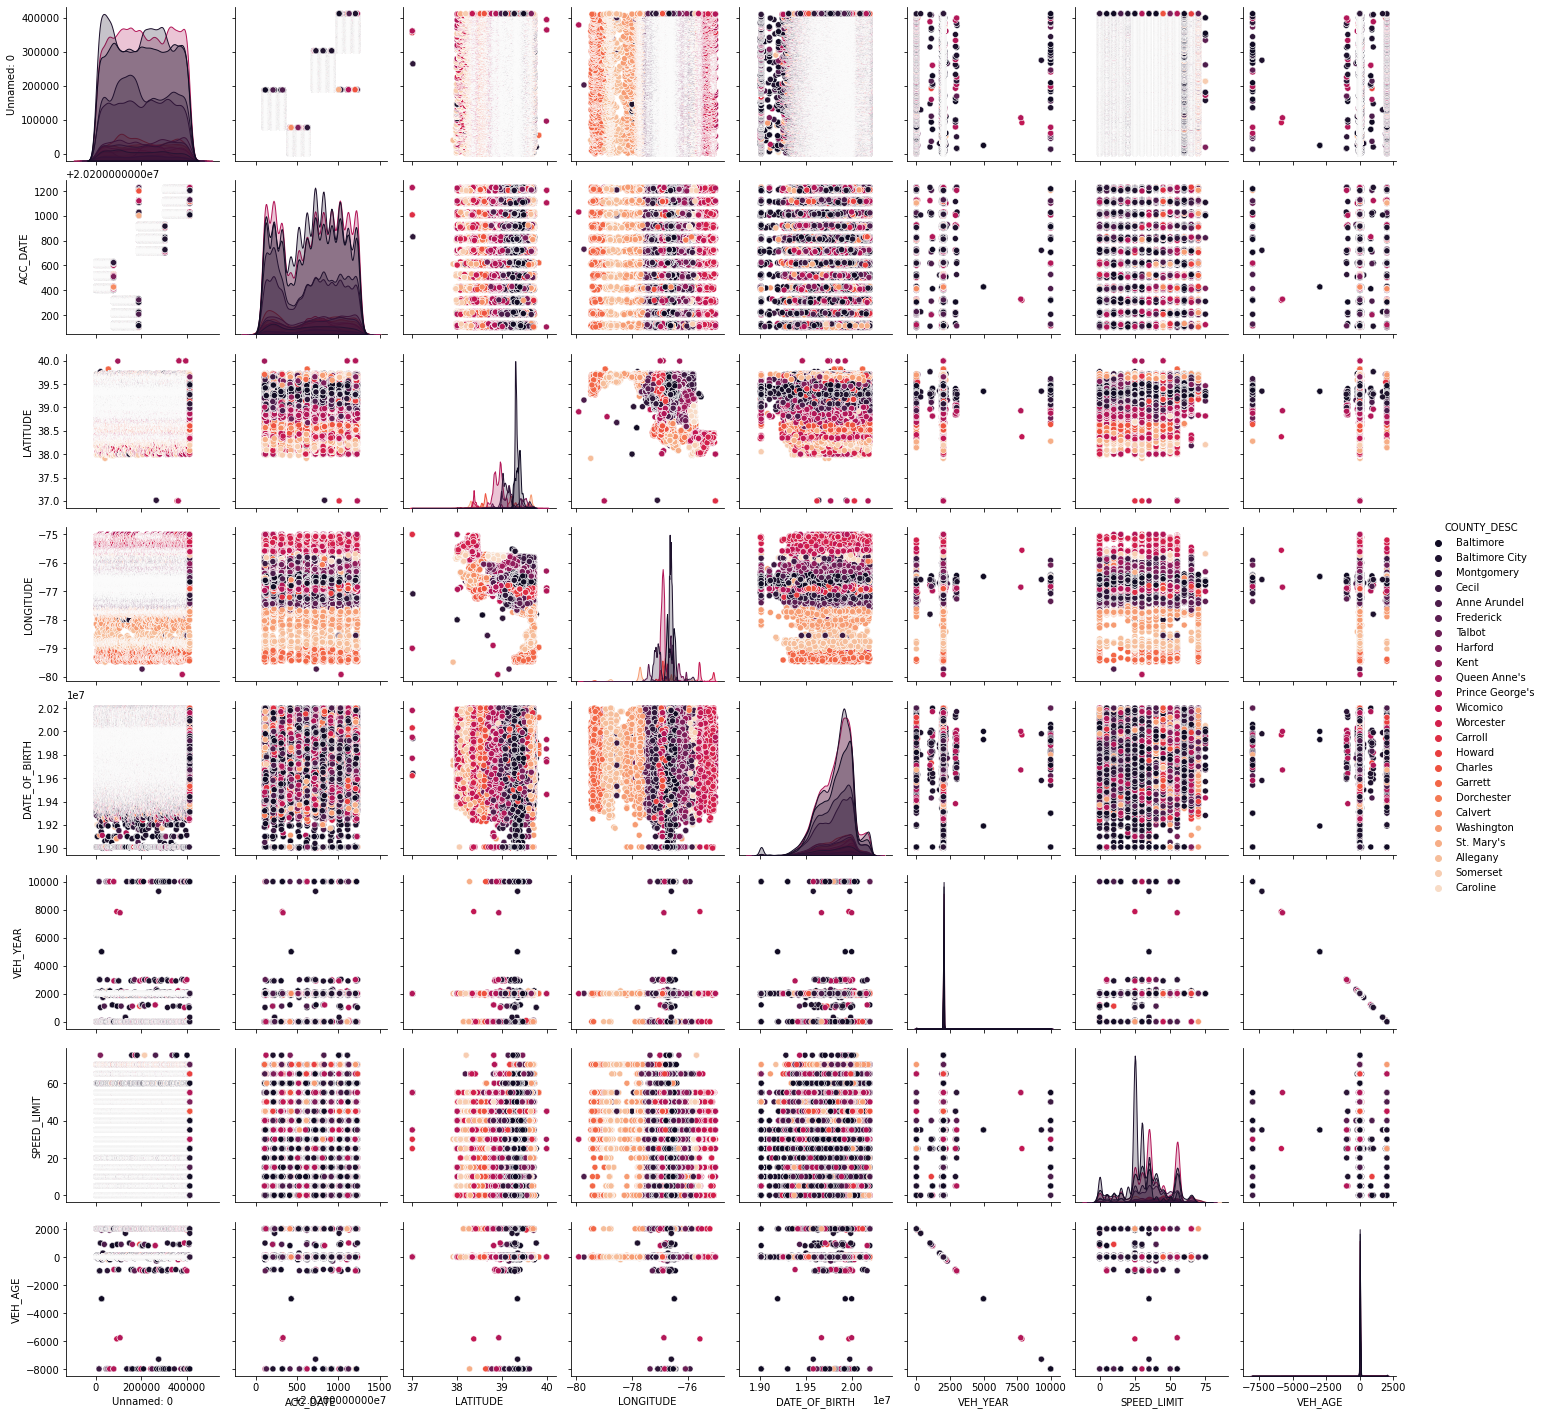

In [28]:

sns.pairplot(md_crash, hue='COUNTY_DESC', palette='rocket')

<AxesSubplot:xlabel='VEH_YEAR'>

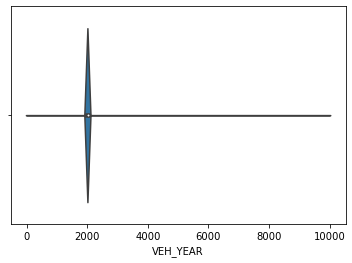

In [29]:
sns.violinplot(x='VEH_YEAR', Y='SPEED_LIMIT', data=md_crash, split=True)

C:\Users\shashi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='COUNTY_DESC', ylabel='count'>

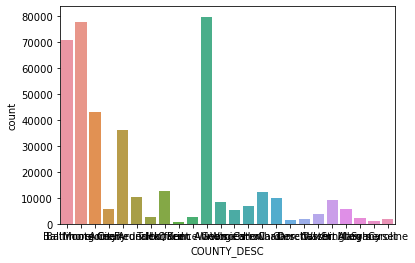

In [30]:
sns.countplot('COUNTY_DESC', data=md_crash)

<AxesSubplot:xlabel='COUNTY_DESC', ylabel='ACC_DATE'>

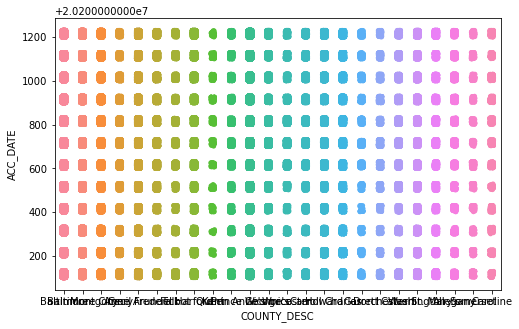

In [31]:
plt.figure(figsize=(8,5))
sns.stripplot(x='COUNTY_DESC', y='ACC_DATE', data=md_crash)